## **PUBG EDA**

###PUBG - Exploratory Data Analysis
####Author:-Sankalpa jena
####Date:-29/05/2021

***Import Library ***

In [ ]:
#importing imoprtant library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (9, 5),
           "figure.dpi": 100
       })

instagram = ["#405DE6", "#5B51D8", "#833AB4", "#C13584", 
             "#E1306C", "#FD1D1D", "#F56040", "#F77737", "#FCAF45", "#FFDC80"]
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]
sns.set_palette(google)

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

def create_fig(figsize=(8,5), dpi=150):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig


In [ ]:
#Import datasets 
df=pd.read_csv('/content/drive/MyDrive/Coursera_Data analytics/data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [ ]:
df.shape

(1111742, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

# Data Cleaning

In [ ]:
df.isna().sum() #cheking null values

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
df.dropna(inplace=True) #Droping the null values
df.shape

(1111741, 30)

In [ ]:
df['weaponsAcquired'].value_counts()

2      192607
3      191969
4      172227
1      145307
5      135438
        ...  
65          1
61          1
58          1
53          1
177         1
Name: weaponsAcquired, Length: 75, dtype: int64

In [ ]:
df.drop(df[df['weaponsAcquired'] > 20].index, inplace=True)

In [ ]:
df['weaponsAcquired'].value_counts()

2     192607
3     191969
4     172227
1     145307
5     135438
6      91783
0      56774
7      56355
8      32307
9      17171
10      8959
11      4570
12      2391
13      1208
14       722
15       372
16       258
17       153
18       144
20       121
19       109
Name: weaponsAcquired, dtype: int64

In [ ]:
#Adding column for better understanding
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

df['headshotRate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1111737    0.0
1111738    0.0
1111739    0.0
1111740    0.0
1111741    0.0
Name: headshotRate, Length: 1110945, dtype: float64

In [ ]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['itemUsed'] = df['heals'] + df['boosts']

# ***Landing Spot***

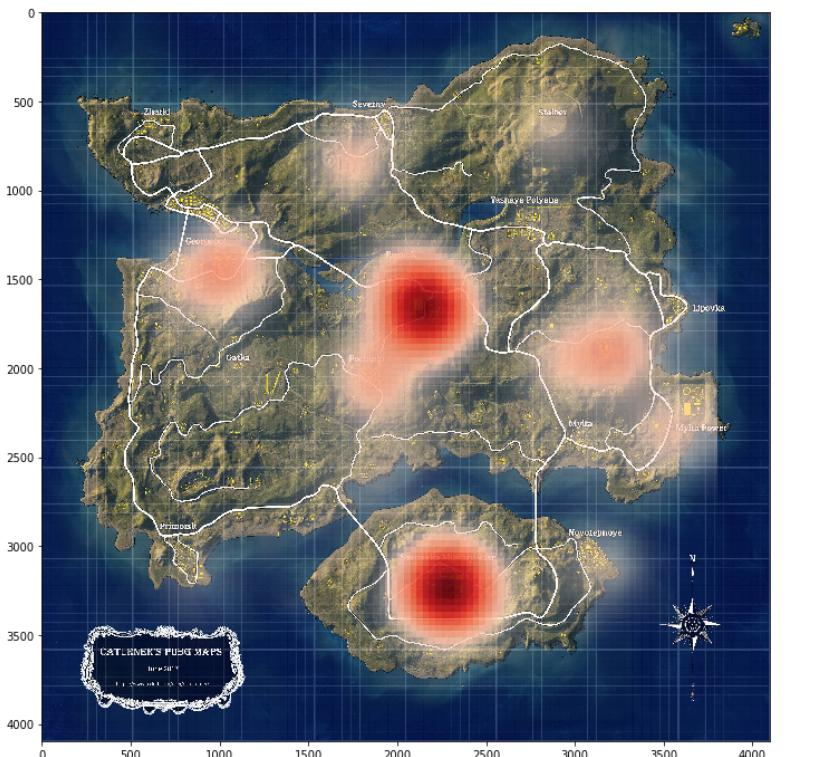

# **EDA**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Coursera_Data analytics/data.csv')
df1 = df1.dropna()

In [ ]:
df1.drop_duplicates(['matchId']).groupby(['matchType']).count()['matchId']

matchType
crashfpp               73
crashtpp                5
duo                  3356
duo-fpp             10620
flarefpp                9
flaretpp               29
normal-duo             12
normal-duo-fpp        154
normal-solo            21
normal-solo-fpp        95
normal-squad           16
normal-squad-fpp      357
solo                 2292
solo-fpp             5678
squad                6658
squad-fpp           18575
Name: matchId, dtype: int64

**KILLS VS WIN**

In [ ]:
#Impact of kill for winning a battle
df_kill_win = df[['kills', 'winPlacePerc']]
df_kill_win.head()

,kills,winPlacePerc
0,0,0.0667
1,0,0.5862
2,0,0.8105
3,0,0.5556
4,1,0.6429


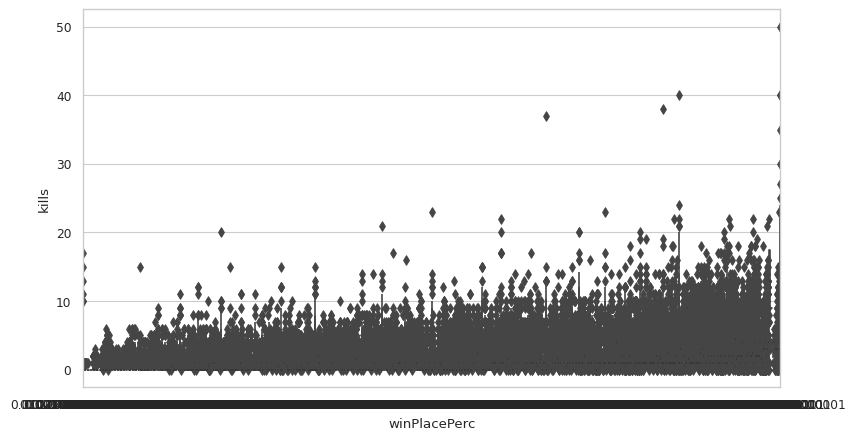

In [ ]:
sns.boxenplot(x="winPlacePerc", y="kills", data=df_kill_win)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


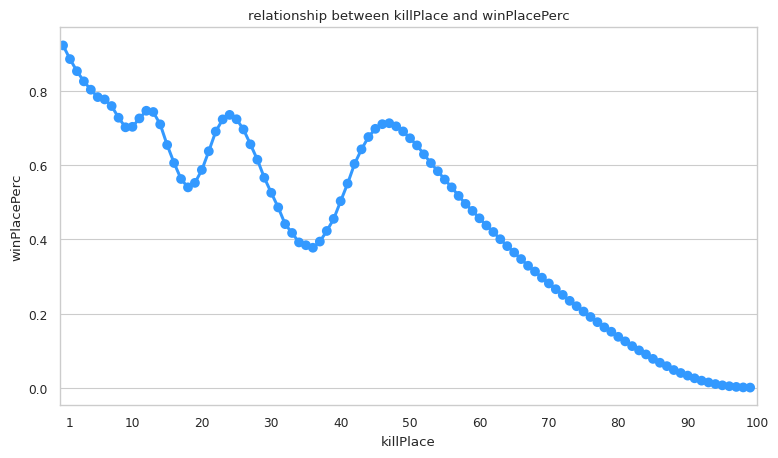

In [ ]:
#using pointplot for defining the relationship between KillPlace & winPlacePerc
sns.pointplot(x='killPlace',y='winPlacePerc',data=df,color='#3399FF',alpha=0.8 )
plt.title('relationship between killPlace and winPlacePerc')
ax = plt.axes() 
ax.set_xticks([1, 10, 20, 30, 40,50,60,70,80,90,100])
ax.set_xticklabels(['1', '10', '20', '30', '40','50', '60', '70', '80', '90','100'])
plt.show()

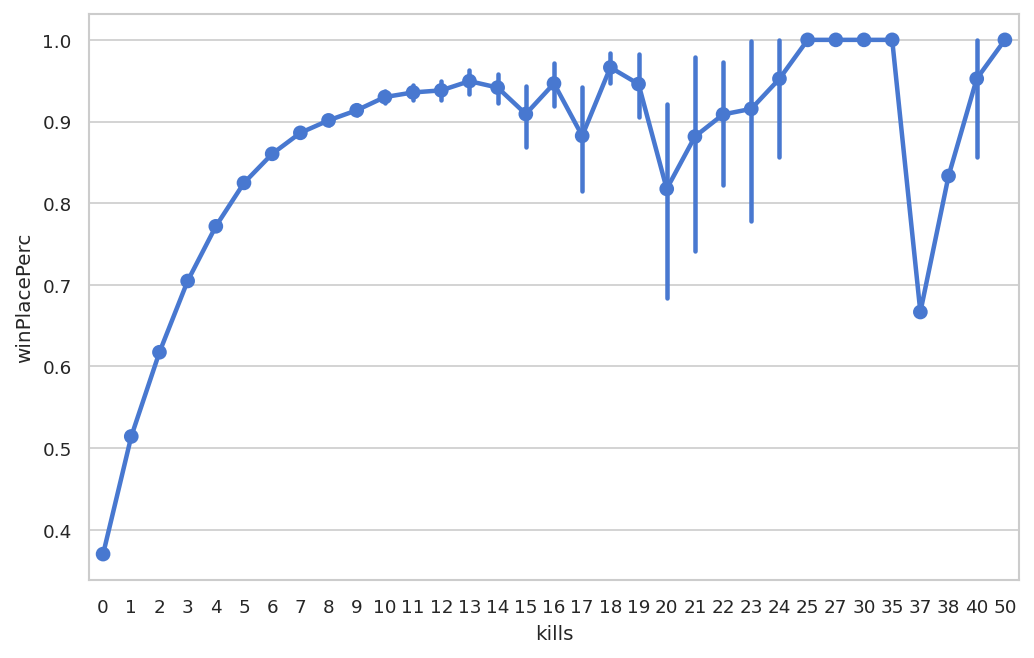

In [ ]:
#impact of kill for winning a battle
create_fig()
sns.pointplot(x='kills', y='winPlacePerc', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


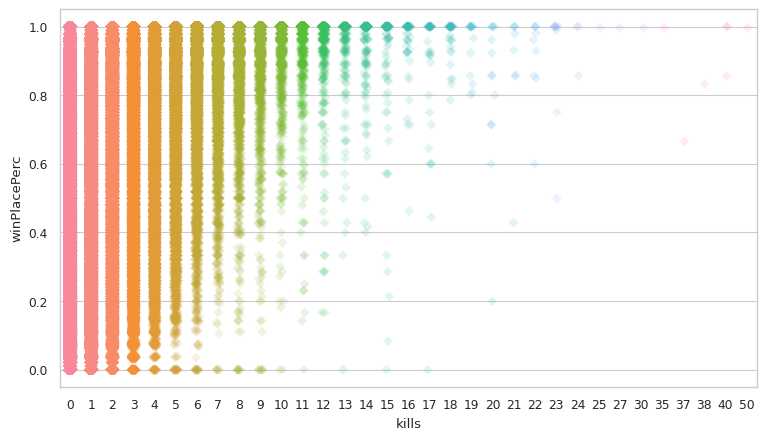

In [ ]:
#impact of kill for winning a battle
sns.stripplot(df['kills'], df['winPlacePerc'], marker="D", alpha=0.15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


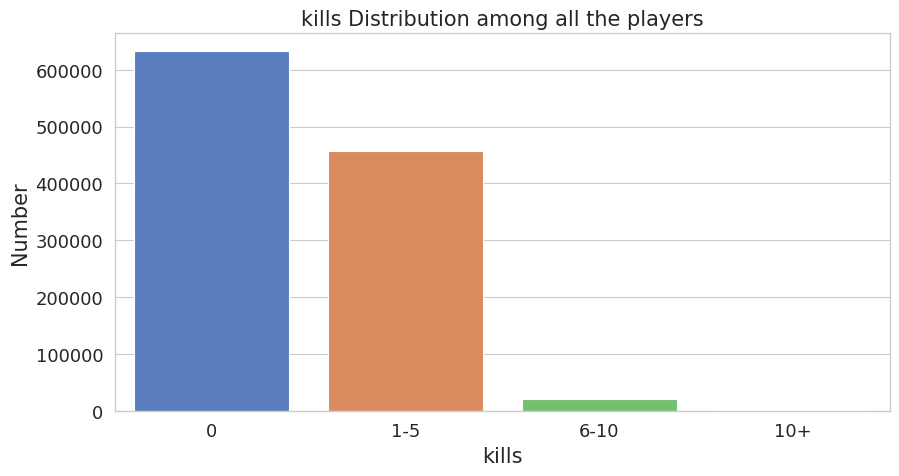

Among all the winners(winPlacePerc=1):
13.2042% players have won with 0 kill.
64.5558% players have won with 1-5 kills.
19.1147% players have won with 6-10 kills.
3.1254% players have won with more than 10 kills.


In [ ]:
#Overall kills distribution  and its distribution among winners.
kills_num=df.copy()
f,ax=plt.subplots(figsize=(10,5))
kills_num['kills'] = pd.cut(kills_num['kills'], [-1,0,5,10,70], labels=['0', '1-5', '6-10','10+'])
plt.title("kills Distribution among all the players",fontsize=15)
sns.countplot(kills_num['kills'].astype('str').sort_values(), order=['0', '1-5', '6-10','10+'])
ax.set_xlabel('kills',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('Number',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
plt.show()
no_kill=df[df['kills']==0].copy()
winner=df[df['winPlacePerc']==1]
print('\033[1m'+"Among all the winners(winPlacePerc=1):")
print("{:.4f}% players have won with 0 kill.".format(100*len(no_kill[no_kill['winPlacePerc']==1])/len(winner)))
low_kill=df[(df["kills"]>0) & (df["kills"]<6)].copy()
print("{:.4f}% players have won with 1-5 kills.".format(100*len(low_kill[low_kill['winPlacePerc']==1])/len(winner)))
high_kill=df[(df["kills"]>5) & (df["kills"]<11)].copy()
print("{:.4f}% players have won with 6-10 kills.".format(100*len(high_kill[high_kill['winPlacePerc']==1])/len(winner)))
killer=df[df['kills']>10].copy()
print("{:.4f}% players have won with more than 10 kills.".format(100*len(killer[killer['winPlacePerc']==1])/len(winner)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


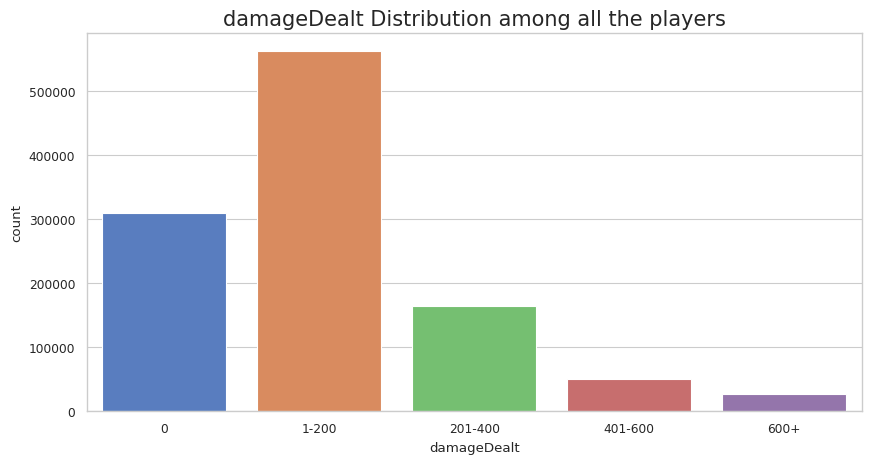

Among all the winners(winPlacePerc=1):
3.7713% players have won with 0 damagedealt.
24.5337% players have won with 1-200 damagedealts.
28.6452% players have won with 201-400 damagedealts.
20.7530% players have won with 401-600 damagedealts.
22.6339% players have won with more than 600 damagedealts.


In [ ]:
#Overall damage distribution  and its distribution among winners.
damage_num=df.copy()
plt.figure(figsize=(10,5))
plt.title("damageDealt Distribution among all the players",fontsize=15)
damage_num['damageDealt'] = pd.cut(damage_num['damageDealt'], [-1,0,200,400,600,7000], labels=['0','1-200','201-400', '401-600','600+'])
sns.countplot(damage_num['damageDealt'].astype('str').sort_values(), order=['0','1-200','201-400', '401-600','600+'])
plt.show()
no_damage=df[df['damageDealt']==0].copy()
print('\033[1m'+"Among all the winners(winPlacePerc=1):")
print("{:.4f}% players have won with 0 damagedealt.".format(100*len(no_damage[no_damage['winPlacePerc']==1])/len(winner)))
low_damage=df[(df["damageDealt"]>0) & (df["damageDealt"]<201)].copy()
print("{:.4f}% players have won with 1-200 damagedealts.".format(100*len(low_damage[low_damage['winPlacePerc']==1])/len(winner)))
high_damage=df[(df["damageDealt"]>200) & (df["damageDealt"]<401)].copy()
print("{:.4f}% players have won with 201-400 damagedealts.".format(100*len(high_damage[high_damage['winPlacePerc']==1])/len(winner)))
higher_damage=df[(df["damageDealt"]>400) & (df["damageDealt"]<601)].copy()
print("{:.4f}% players have won with 401-600 damagedealts.".format(100*len(higher_damage[higher_damage['winPlacePerc']==1])/len(winner)))
damager=df[df['damageDealt']>600].copy()
print("{:.4f}% players have won with more than 600 damagedealts.".format(100*len(damager[damager['winPlacePerc']==1])/len(winner)))

**LongestKill**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text major ticklabel objects>)

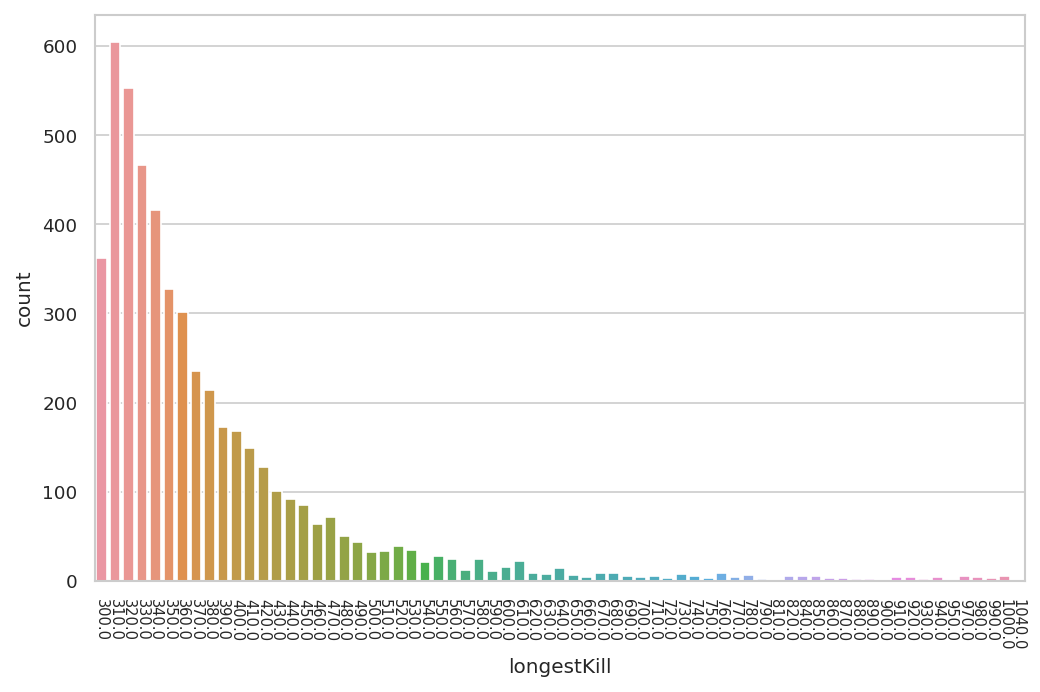

In [ ]:
create_fig()
sns.countplot(np.round(df[df['longestKill'] > 300]['longestKill'], -1))
plt.xticks(rotation=-90, size=7)

**Headshot Rate**

In [ ]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

In [ ]:
df['headshotRate'].describe()

count    1.110945e+06
mean     1.031183e-01
std      2.605604e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: headshotRate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


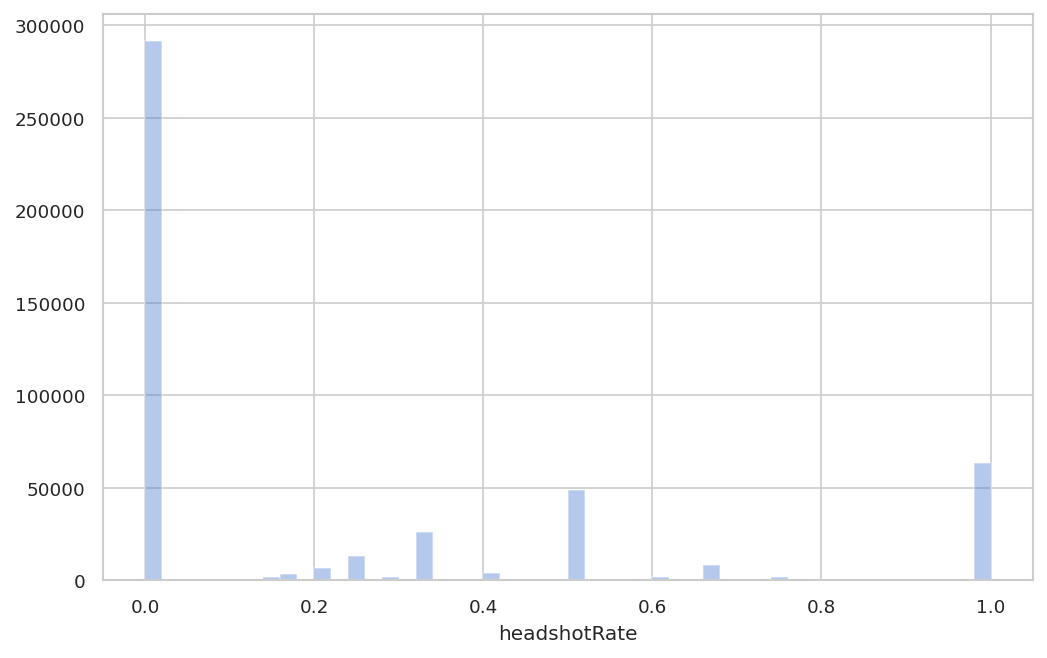

In [ ]:
create_fig()
sns.distplot(df[df['kills'] > 0]['headshotRate'], kde=False)

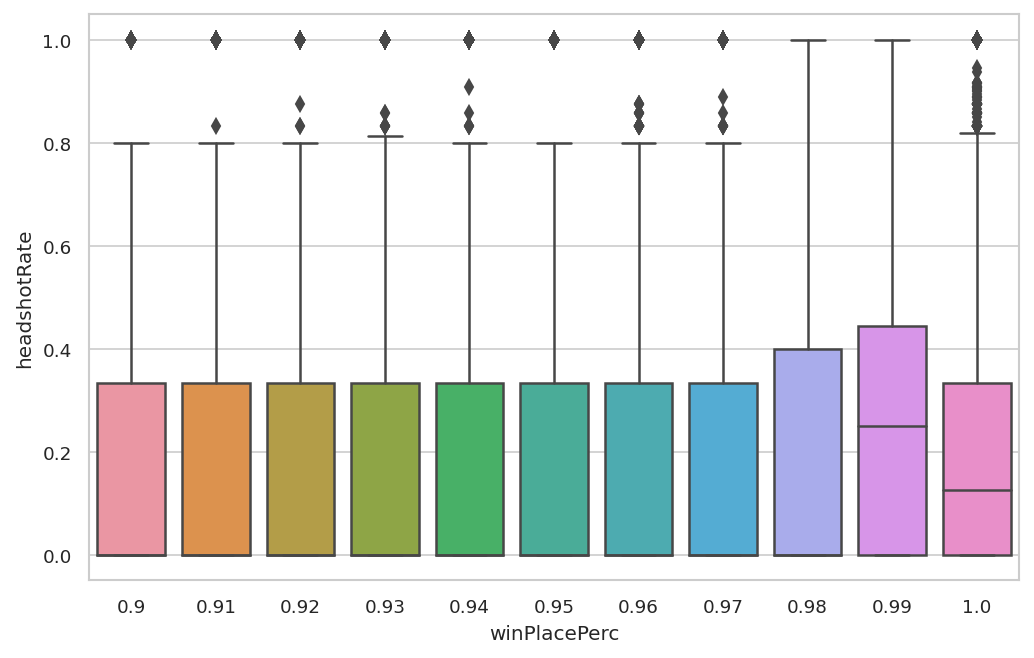

In [ ]:
#Relationship between headshotRate & winPlacePerc
create_fig()
sns.boxplot(x='winPlacePerc', y='headshotRate', data=top_df)

***Camper***

In [ ]:
#Can a camper most probably win battle?
#mostly not!!
df['totalDistance'].describe()

count    1.110945e+06
mean     1.762385e+03
std      2.180820e+03
min      0.000000e+00
25%      1.583000e+02
50%      7.857000e+02
75%      2.724000e+03
max      3.731200e+04
Name: totalDistance, dtype: float64

In [ ]:
df[(df['totalDistance'] < 2000) & df['kills'] > 5]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,totalDistance,itemUsed


**Heal Boost & Winner**

Text(0.5, 0, 'Number of item')

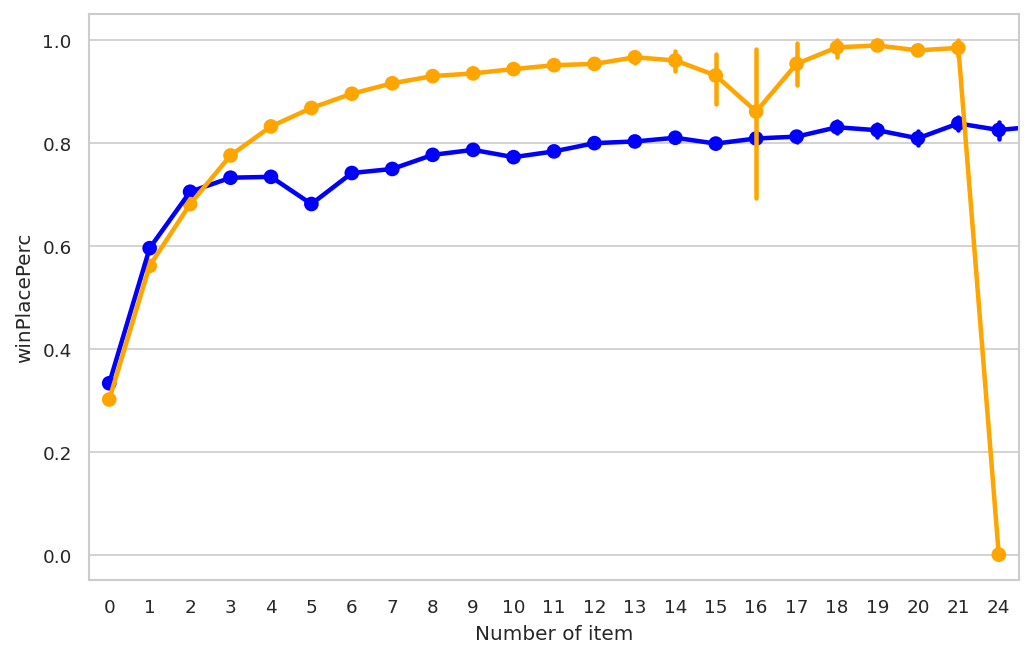

In [ ]:
#Impact of Heal & Boost for wiinig a battle
#The most use of Heal & Boost mostly causes win beacause the player involve in fight and survive most!
create_fig()
sns.pointplot(x='heals', y='winPlacePerc', data=df, color='blue', label='heal')
sns.pointplot(x='boosts', y='winPlacePerc', data=df, color='orange', label='boost')
plt.xlabel('Number of item')

**Correlation**

In [ ]:
df_corr = df.corr()

In [ ]:
select_corr_cols = df_corr[np.abs(df_corr) > 0.5]['winPlacePerc'].dropna().index

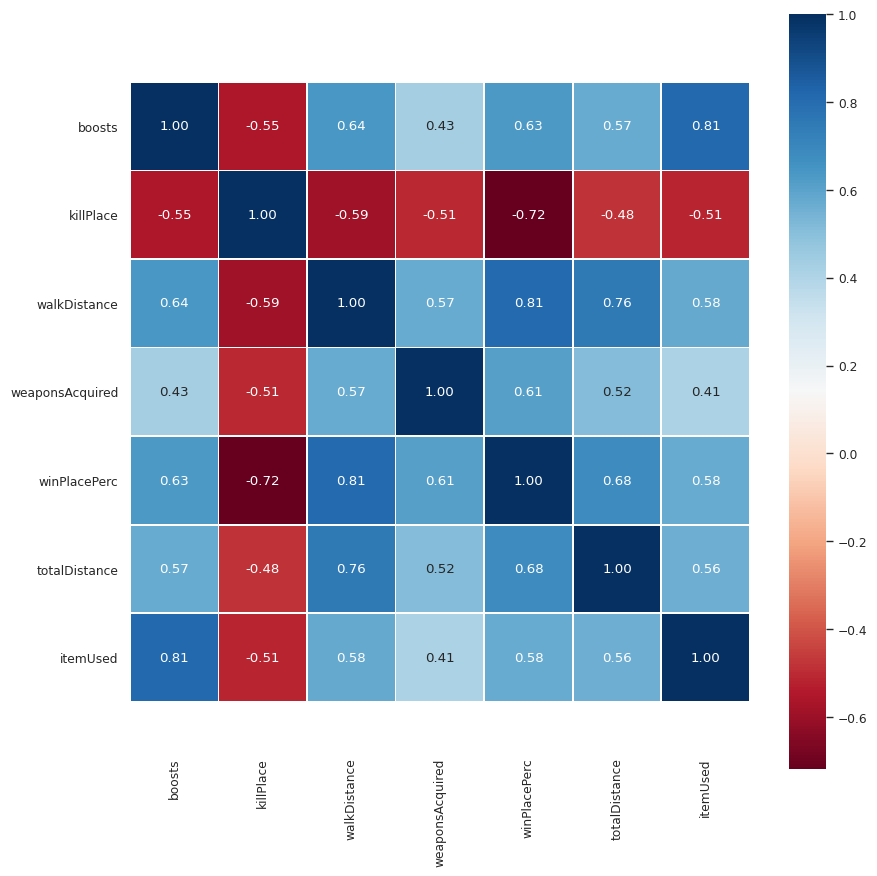

In [ ]:
f,ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.heatmap(df_corr.loc[select_corr_cols.tolist(), select_corr_cols], annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()

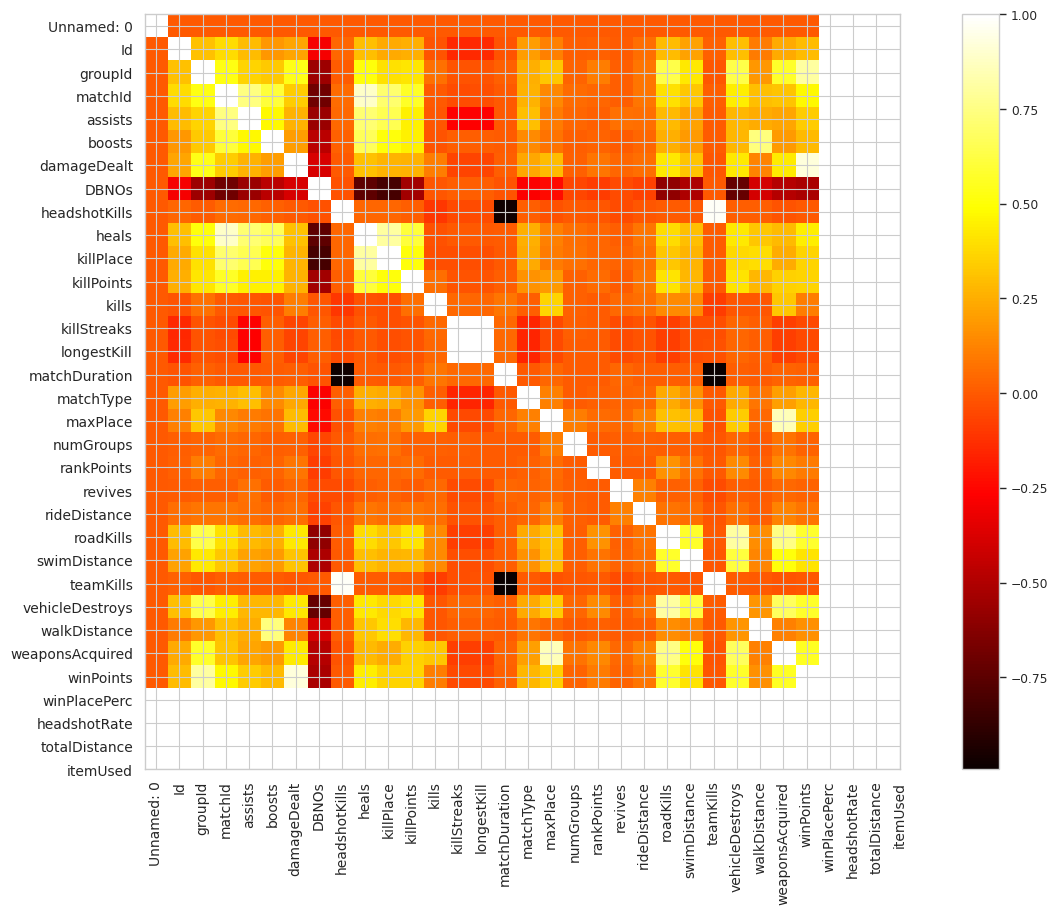

In [ ]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
labels = df.columns.tolist()
ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))
ax1.set_xticklabels(labels,rotation=90, fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)
plt.show()

**Top 10**

In [ ]:
#top 10 out of 100 
top_df = df[df['winPlacePerc'] >= 0.90]
top_df['winPlacePerc'] = np.round(top_df['winPlacePerc'], 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_df.iloc[:, 0:15].describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill
count,1.168470e+05,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000
mean,2.231449e+06,0.709783,3.563677,317.663897,1.432163,0.669799,3.364006,17.158926,534.451976,2.606271,1.091119,74.720306
std,1.284399e+06,0.996165,2.324982,269.734913,1.810097,1.078032,3.690049,14.829817,664.146876,2.533712,0.773553,84.544313
min,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.115536e+06,0.000000,2.000000,115.800000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,7.815500
50%,2.237096e+06,0.000000,3.000000,257.900000,1.000000,0.000000,2.000000,12.000000,0.000000,2.000000,1.000000,48.730000
75%,3.347286e+06,1.000000,5.000000,450.900000,2.000000,1.000000,5.000000,25.000000,1251.000000,4.000000,2.000000,111.900000
max,4.446942e+06,13.000000,21.000000,4495.000000,33.000000,42.000000,54.000000,71.000000,2115.000000,50.000000,20.000000,1003.000000


In [ ]:
top_df.iloc[:, 15:].describe()

,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,totalDistance,itemUsed
count,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000,116847.000000
mean,1580.096006,44.246545,42.750109,912.221632,0.391538,1396.300378,0.008404,12.951135,0.015773,0.021276,2815.114036,5.462177,618.072086,0.960221,0.196041,4224.365549,6.927683
std,260.254878,23.742728,23.212427,755.908445,0.696879,2181.971900,0.116275,51.749840,0.127179,0.152996,989.839881,2.185512,753.545475,0.031312,0.290052,2344.207575,4.999915
min,246.000000,2.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000
25%,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2261.000000,4.000000,0.000000,0.930000,0.000000,2736.000000,3.000000
50%,1439.000000,30.000000,30.000000,1464.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2829.000000,5.000000,0.000000,0.960000,0.000000,3498.467000,6.000000
75%,1852.000000,49.000000,47.000000,1511.000000,1.000000,2194.000000,0.000000,0.000000,0.000000,0.000000,3369.000000,7.000000,1505.000000,1.000000,0.333333,5353.000000,10.000000
max,2237.000000,100.000000,100.000000,5665.000000,18.000000,35400.000000,6.000000,2668.000000,5.000000,4.000000,13960.000000,20.000000,2002.000000,1.000000,1.000000,37312.000000,57.000000


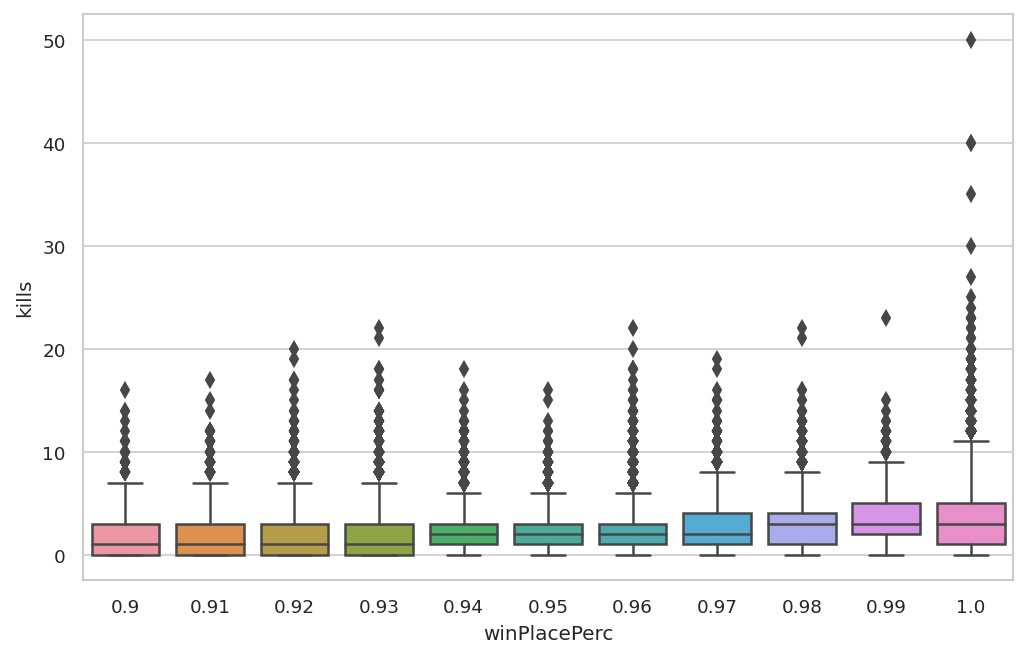

In [ ]:
create_fig()
sns.boxplot(x='winPlacePerc', y='kills', data=top_df)

**Boosts , WeaponsAcquired , Heals VS Win**

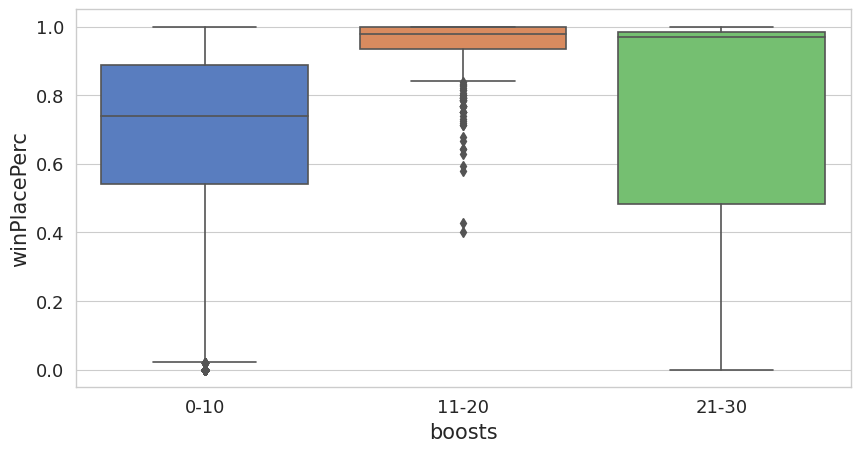

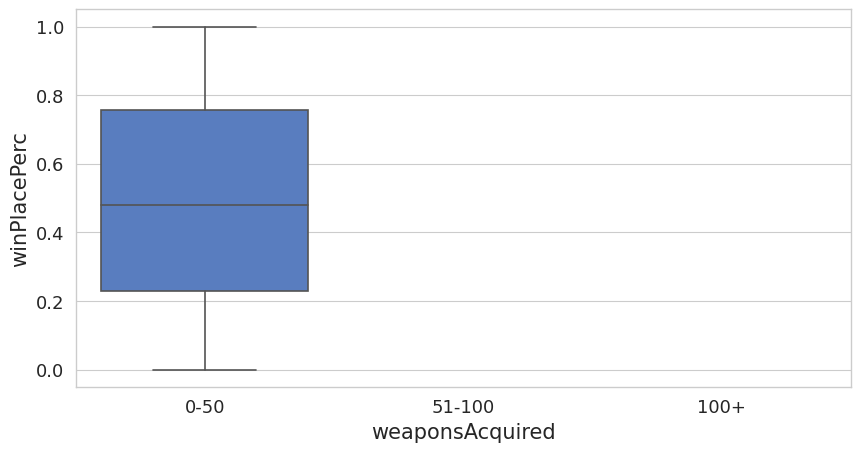

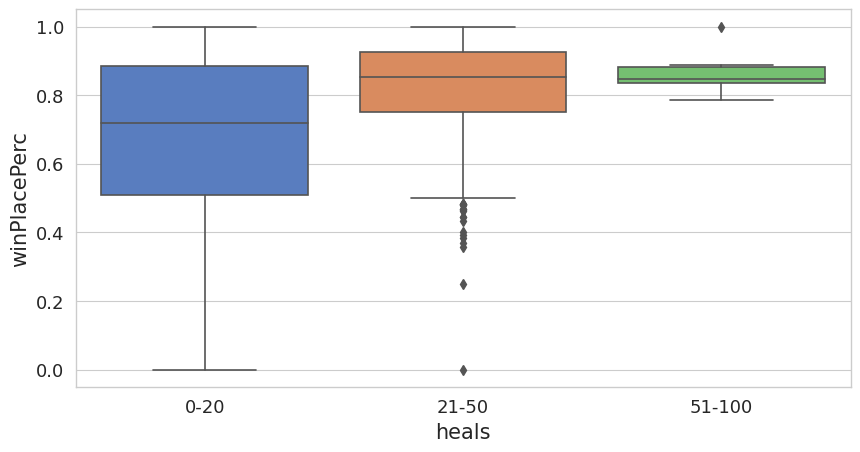

In [ ]:
#Impact of Boosts,weaponsAcquired and Heals for winning a battle
boosts =df.copy()
boosts['boosts'] = pd.cut(boosts['boosts'], [0, 10, 20, 30], labels=['0-10', '11-20', '21-30'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="boosts", y="winPlacePerc", data=boosts)
ax.set_xlabel('boosts',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()
weapons =df.copy()
weapons['weaponsAcquired'] = pd.cut(weapons['weaponsAcquired'], [0, 50, 100, 500], labels=['0-50', '51-100', '100+'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="weaponsAcquired", y="winPlacePerc", data=weapons)
ax.set_xlabel('weaponsAcquired',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()
heals =df.copy()
heals['heals'] = pd.cut(heals['heals'], [0, 20, 50, 100], labels=['0-20', '21-50', '51-100'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="heals", y="winPlacePerc", data=heals)
ax.set_xlabel('heals',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()

# **CONCLUSION**

In this notebook we derive importtant insight from the datasets , which help us to understanding the whole concept behind the csv file , we compare some important aspect which affect the wining ratio of a plyaer.
In this notebook we conclude which feature is really important to win a game by derive realationship between the important feature with respect to the target feature.